**Projeto final python EBAC**

Desenvolvido por [Gabriel Abiyê](https://www.linkedin.com/feed/?trk=homepage-basic_sign-in-submit)

# **Tópicos**

<ol type="1">
  <li>Apresentação;</li>
  <li>Exploração de dados;</li>
  <li>Transformação e limpeza de dados;</li>
  <li>Visualização de dados;</li>
  <li>Storytelling.</li>
</ol>


## 1\. Apresentação

Me chamo Gabriel Abiyê, no momento de desenvolvimento desse nootebook possuo 28 anos. Sou formado em Administração empresarial pela Universidade Salvador (UNIFACS), pós graduado em Business Intelligence pela Estácio.
O intuito desse notobook é explorar os dados de crédito de uma instituição financeira que podem ser acessados nesse [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Para isso irei utilizar da linguagem de programação python atrelado ferramentas e conhecimentos pessoais adquiridos ao longo do tempo.

## 1\. Exploração de dados;

Os dados mencionados estão em formato CSV, e temos interesse especial na coluna **default** que possui a informação se o cliente é adimplente, tendo como resultado (default = 0) ou inadiplente resultando em (default = 1). Atraves dessa e outras variáveis, busco identificar o porque o cliente deixa de honrar com suas dívidas tornando-se inadimplente.

> O atributo de interesse (`default`) é conhecido como **variável resposta** ou **variável dependente**, já os demais atributos que buscam explicá-la (`idade`, `salário`, etc.) são conhecidas como **variáveis explicatívas**, **variáveis independentes** ou até **variáveis preditoras**.

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

O primeiro passo é importar as bibliotecas que serão usadas durante o processo. Neste proejto utilizarei o pandas, seaborn e matplotlib. Pandas é uma biblioteca de código aberto amplamente utilizada em Python para análise e manipulação de dados. Ela oferece estruturas de dados de alto desempenho e fáceis de usar, como DataFrames e Series, que permitem armazenar e manipular dados de maneira eficiente. Seaborn é uma biblioteca de visualização de dados em Python baseada no Matplotlib. Ela oferece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. Matplotlib é uma biblioteca de plotagem 2D em Python que produz figuras de qualidade em uma variedade de formatos e ambientes interativos. Ele pode ser usado para gerar gráficos, histogramas, espectrogramas, gráficos de barras,
erros, gráficos de dispersão, etc.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv' , na_values = ['NaN' , 'na' , ''])

In [4]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


### **2.1. Estrutura**

Neste tópico busco entender um pouco mais sobre a base de dados, como os dados estão estruturados.

In [5]:
df.shape # retorna a quantidade de linhas e colunas da base de dados respectivamente.

(10127, 16)

In [6]:
qtd_total , _ = df.shape  # quantidade total de clientes.
qtd_adimplentes , _ = df[df['default'] == 0].shape # retorna a quantidade de clientes com default = 0. Ou seja quantos clientes adimplentes.
qtd_inadimplentes , _ = df[df['default'] == 1].shape # retorna a quantiade de clientes com default = 1. Ou seja quantos clientes inadimplentes.

print('A quantidade total de clientes é de {}'.format(qtd_total))
print('A quantidade de clientes adimplentes é de {} com a proporção de {}% '.format(qtd_adimplentes ,  round (100 * qtd_adimplentes / qtd_total , 2)))
print('A quantidade de clientes inadimplentes é de {} com a proporção de {}% '.format(qtd_inadimplentes ,  round (100 * qtd_inadimplentes / qtd_total , 2)))

A quantidade total de clientes é de 10127
A quantidade de clientes adimplentes é de 8500 com a proporção de 83.93% 
A quantidade de clientes inadimplentes é de 1627 com a proporção de 16.07% 


### **2.2. Schema**

Verificando os tipos de dados de cada coluna, pra saber se serão necessárias alterações para melhor utilização dos dados.

In [7]:
df.head(n=5) # Visualizando as 5 primeiras linhas de cada coluna

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [8]:
df.dtypes # Visualizando os tipos de cada coluna

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

 - Atributos **categóricos**.

In [9]:
df.select_dtypes('object').describe().transpose() # Visualizando todas as colunas com o tipo 'objeto'.

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


- Atributos **Numéricos**.

In [10]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose() # Visualizando todas as colunas com o tipo 'número'.

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


- Verificando dados faltantes

Dados faltantes podem ser:

- Vazios ("");
- Nulos (None);
- Não disponíveis ou aplicaveis (na, NA, etc.);
- Não numérico (nan, NaN, NAN, etc).

In [11]:
df.isna().any() # Verificando colunas com dados faltantes.

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

 - A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [12]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [13]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [14]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [15]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## 3\. Transformação e limpeza de dados

Após a exploração dos dados foi possível retirar informações relevantes sobre a base de dados. Por isso vamos fazer um *data wrangling* que consiste na limpeza e transformação dos dados para melhor análise. Uma alteração que se faz necessária é o tipo das colunas:
- **'limite_credito'**
- **'valor_transacoes_12m'.**

Um outro impasse encontrado são as colunas com valores vazios ou inexistentes. Para um análise de dados mais precisa, será necessário retirar esses valores.

### **3.1. Correção de schema**

Na etapa de exploração, notamos que as colunas limite_credito e valor_transacoes_12m estavam sendo interpretadas como colunas categóricas (`dtype = object`).
Os dados também estão escritos no formato brasileiro, o que impacta na leitura do python, por isso será necessário fazer alteração para que seja compreendido como moeda.

In [16]:
df[['limite_credito' , 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

- Formatando a coluna para que fique no formato numérico (`dtype = float64`).

In [17]:
#aplicando a função nas colunas:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor : float(valor.replace('.' , '').replace(',' , '.')))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace('.' , '').replace(',' , '.')))


- Verificando se as aplicações funcionaram.

In [18]:
df[['limite_credito' , 'valor_transacoes_12m']].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

In [19]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### **3.2. Retirando dados faltantes**

In [20]:
df.dropna(inplace=True)

- Analisando a estrutura dos dados após a retirada dos dados faltantes

In [21]:
df.shape

(7081, 16)

In [22]:
df[df['default'] == 0].shape

(5968, 16)

In [23]:
df[df['default'] == 1].shape

(1113, 16)

- Reatribuindo os valores após a retirada dos dados faltantes

In [24]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [25]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


## 4\. Visualizando os **dados**

Nesta seção, visualizaremos a variável 'default' em relação a outras variáveis para que seja possível retirar insights relevantes para o relatório final.

In [26]:
df_adimplente = df[df['default'] == 0]

In [27]:
df_inadimplente = df[df['default'] == 1]

### **4.1. Visualizações categóricas**



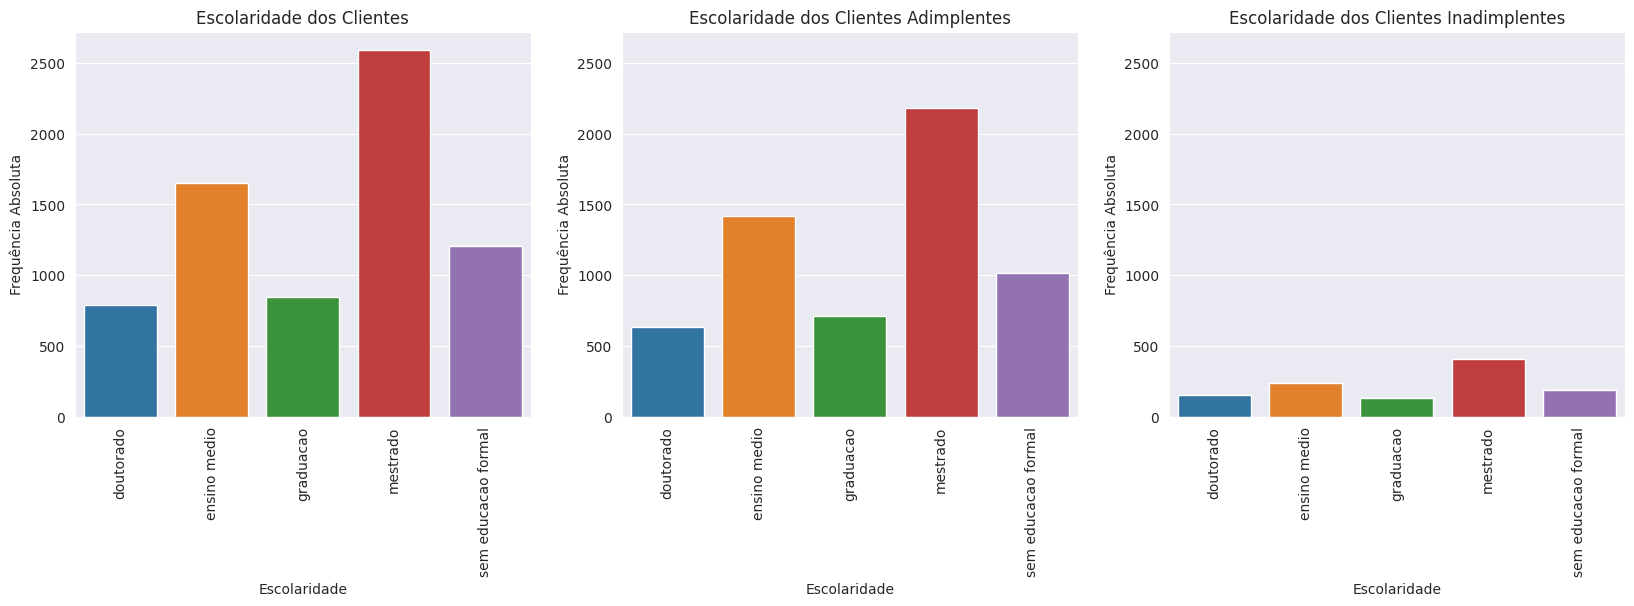

In [49]:
sns.set_style('darkgrid')

coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**Insights**
- A instituição possui uma quantidade considerável de clientes sem nenhuma educação formal.


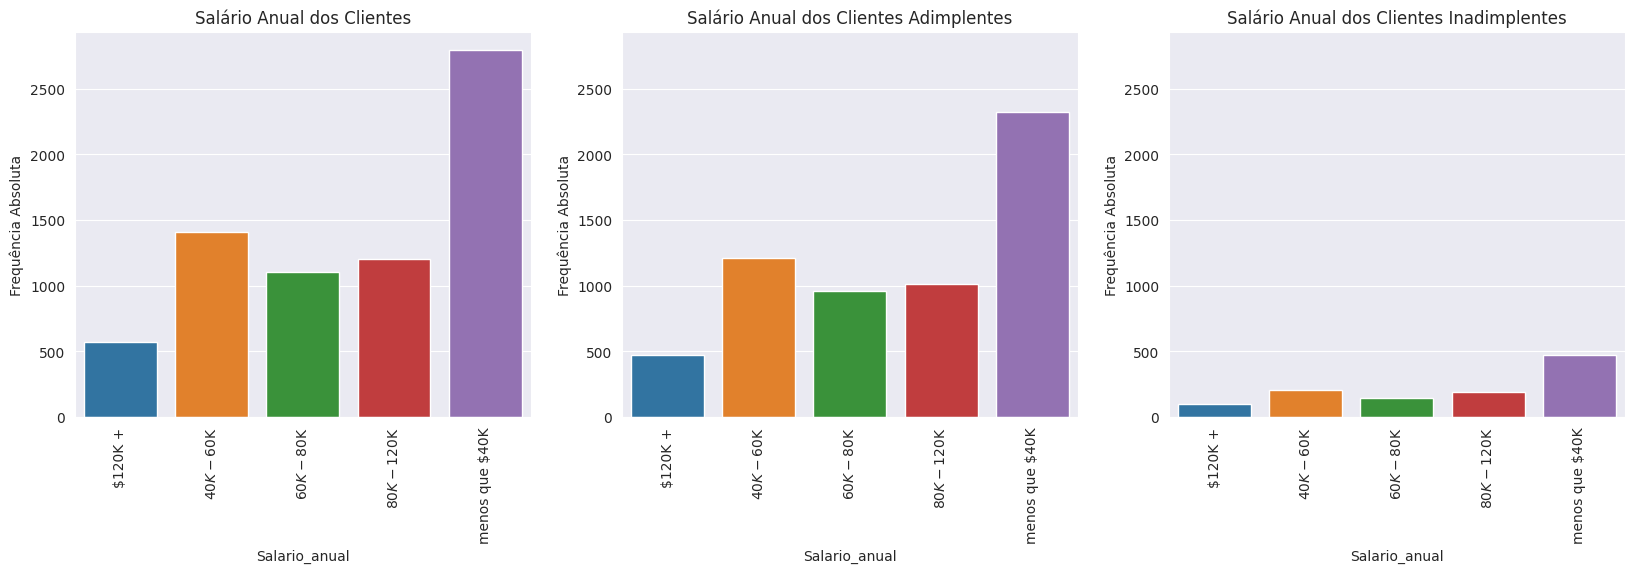

In [29]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

**Insights**
- A maioria dos clientes da instituição possui um salário anual inferior a 40.000 dinheiros.
- Notavelmente, os clientes com os salários anuais mais altos são os menos inadimplentes na instituição.

### **4.1. Visualizações númericas**

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos.

In [30]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


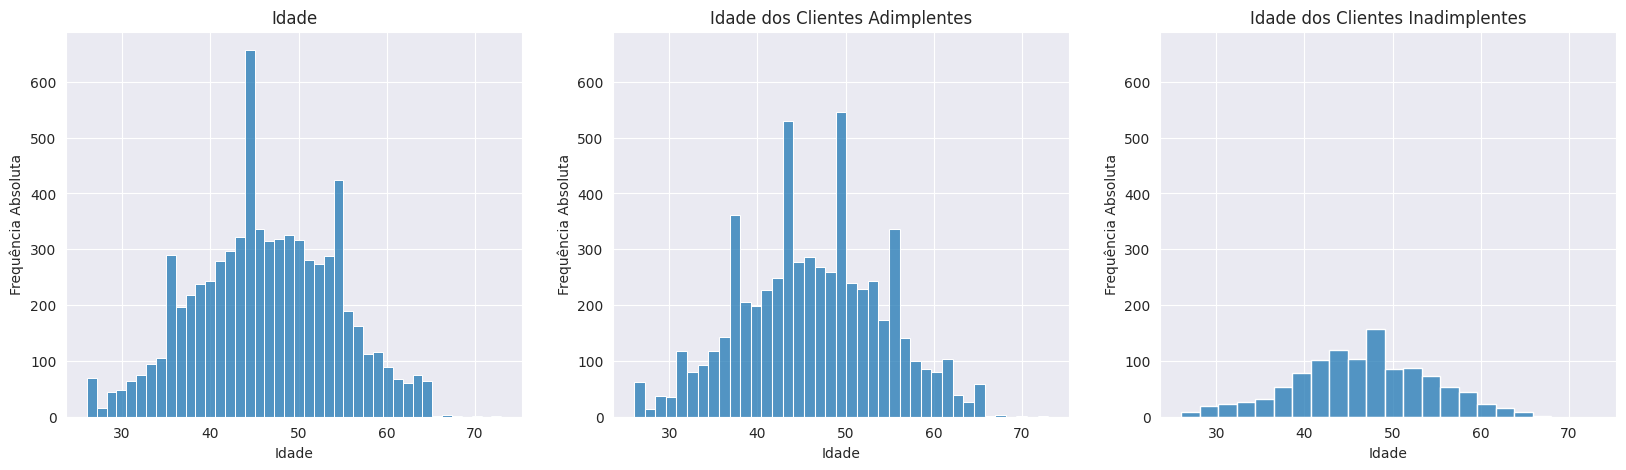

In [34]:
coluna = 'idade'
titulos = ['Idade', 'Idade dos Clientes Adimplentes', 'Idade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**Insights**
- A maioria dos clientes adimplentes possui entre 37 e 55 anos de idade.
- Os clientes mais idosos, com 60 anos ou mais, não constituem uma parte significativa do público-alvo da instituição. Em comparação com o gráfico dos inadimplentes, são relativamente poucos. Essa informação pode indicar uma oportunidade para focar em estratégias de captação desse grupo, devido à sua tendência a serem clientes financeiramente responsáveis.

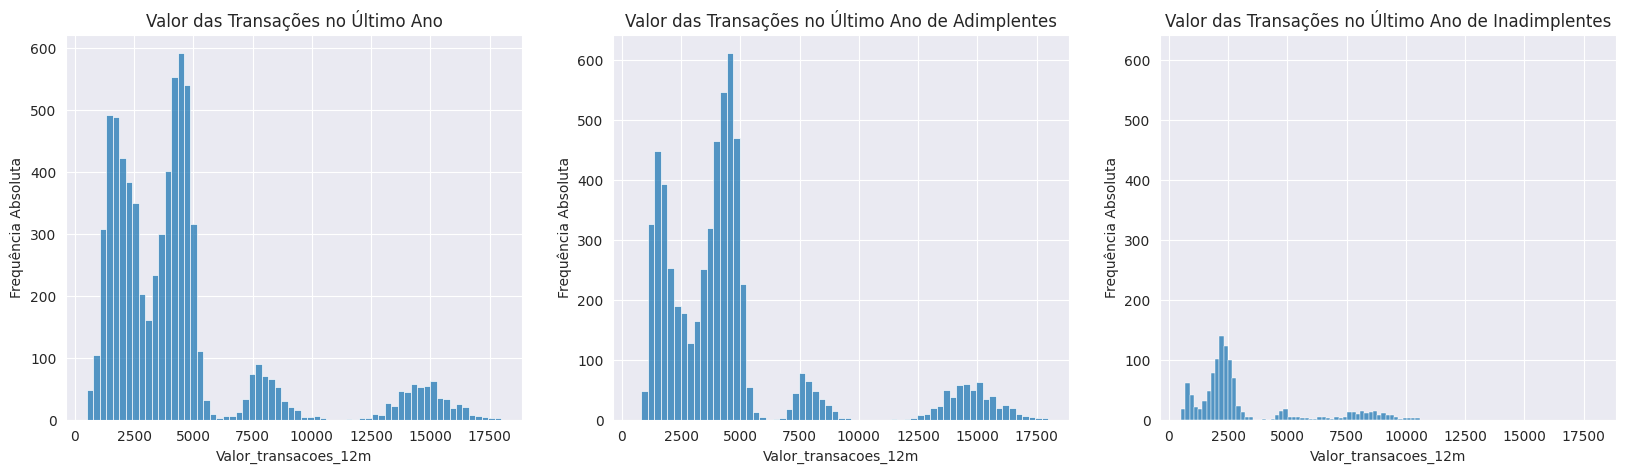

In [48]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

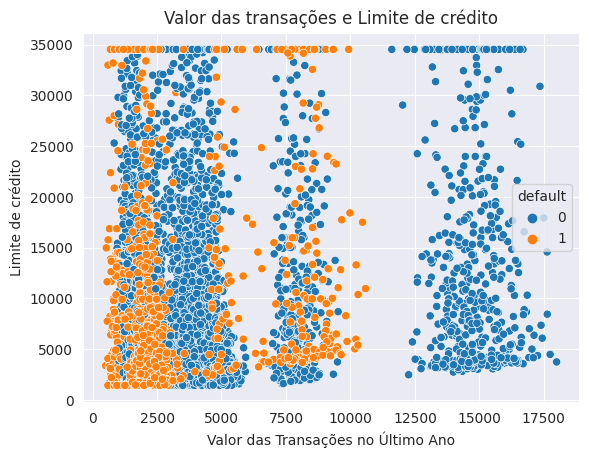

In [46]:
f = sns.scatterplot(x='valor_transacoes_12m', y='limite_credito', data=df, hue='default')
_ = f.set(
    title='Valor das transações e Limite de crédito',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Limite de crédito'
  )

**Insights**
- Clientes com limite de crédito abaixo de 7000 dinheiros e com transações abaixo de 2500 dinheiros representam uma parcela considerável entre os inadimplentes.
- Clientes que realizam compras acima de 11000 dinheiros são identificados como ótimos pagadores, demonstrando maior responsabilidade financeira e pontualidade no pagamento.

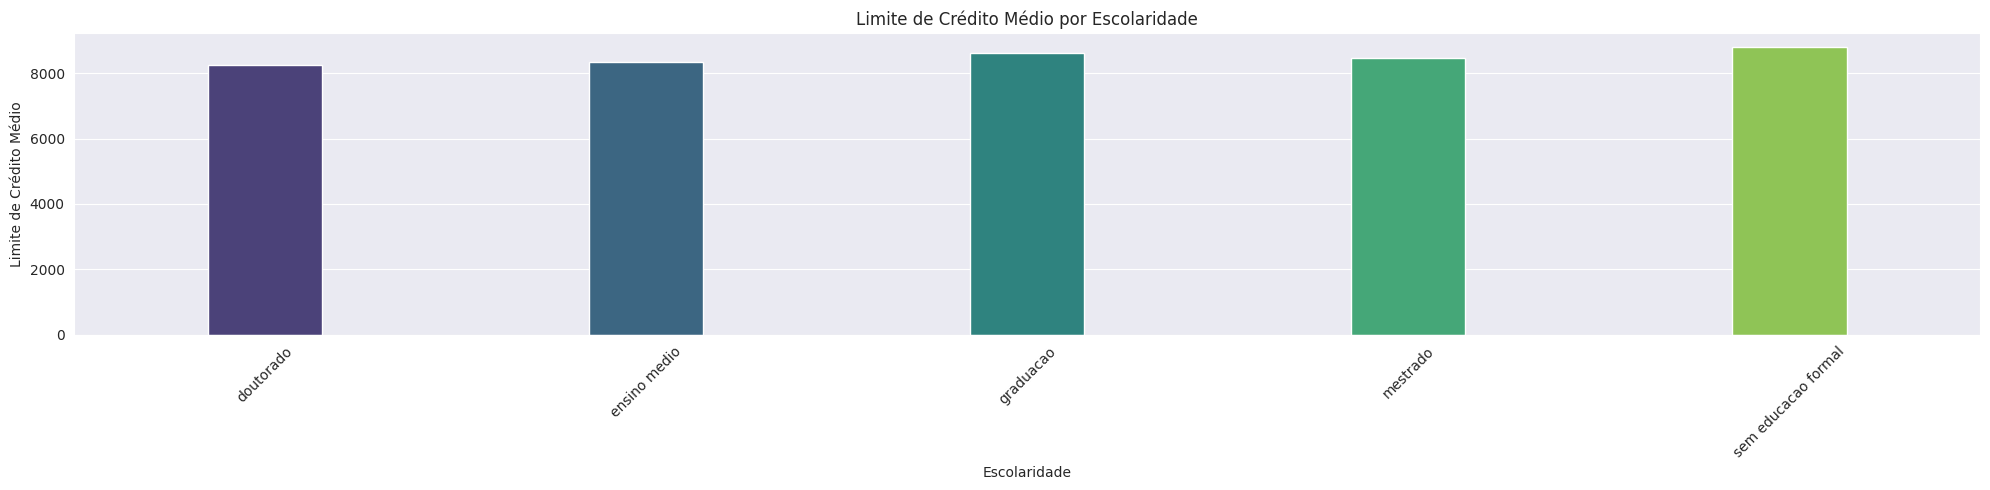

In [64]:
media_limite_por_escolaridade = df.groupby('escolaridade')['limite_credito'].mean().reset_index()

plt.figure(figsize=(20, 5))
ax = sns.barplot(data=media_limite_por_escolaridade, x='escolaridade', y='limite_credito', palette='viridis', width=0.3)
plt.xlabel('Escolaridade')
plt.ylabel('Limite de Crédito Médio')
plt.title('Limite de Crédito Médio por Escolaridade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights**
- A instituição não considera o nível de educação formal como um parâmetro relevante para a aprovação de crédito.
- A média do limite de crédito para clientes sem educação formal é mais elevada do que a de qualquer outro grupo de escolaridade.

## 5\. Storytelling

Ao analisar os gráficos apresentados, surgiram insights valiosos sobre a instituição financeira em estudo. É notável que os clientes mais idosos, com 60 anos ou mais, representam uma parcela pequena do público-alvo da instituição, evidenciando uma oportunidade para estratégias de captação desse grupo, dada sua propensão a manter uma boa saúde financeira. Recomenda-se a consideração de abordagens focadas para atrair e atender esse segmento.

Outro ponto relevante é a necessidade de uma revisão nos critérios de aprovação de crédito, especialmente a inclusão da variável escolaridade, pois pode ter um papel crucial nesse processo. A atenção a detalhes como a escolaridade dos clientes pode aprimorar a precisão na aprovação de crédito, contribuindo para a saúde financeira da instituição.

Além disso, destaca-se a presença significativa de inadimplentes entre os clientes com limite de crédito inferior a 7000 dinheiros e transações abaixo de 2500 dinheiros. É crucial direcionar esforços para essa faixa de clientes, implementando estratégias preventivas para evitar que eles se tornem inadimplentes, o que pode incluir orientações financeiras e ofertas de produtos adequados às suas necessidades.